# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 11</span>

In questa esercitazione vogliamo approfondire il mondo delle reti neurali, in particolare facendo fit su diversi tipi di funzioni alle quali viene aggiunto del rumore. Per fare questo produrremo dei dati secondo una certa legge, sommeremo del rumore generato in maniera pseudo casuale e, infine, costruiremo delle reti che possano essere in grado di dare un output dato un input. Fondamentale, come vedremo, è dividere il dataset creato in dataset di *training* e dataset di *validazione*. Il primo serve ad allenare la rete, stabilire i pesi dei diversi collegamenti tra i neuroni e i rispettivi *bias*. Il secondo serve a testare la rete e quantificare la sua performance. 

Una rete è definita a partire dalla disposizione dei neuroni e il loro numero, dal numero di collegamenti tra di essi, dalle funzioni di attivazione, dalla funzione costo che si vuole minimizzare e dall'algoritmo di ottimizzazione scelto per allenare la rete.

### Esercizio 11.1

In questo esercizio vogliamo osservare come performa una rete neurale per fare un fit lineare, variando tre tipi di parametri: l'ampiezza del rumore presente nei dati di *training* e validazione, il numero di di dati di *training* e il numero di epoche.

Per fare ciò implementiamo una routine di python che sia in grado di:
- produrre i dati, di *training* e validazione: in particolare vengono generati punti su una retta con coefficiente angolare $m=5$ e intercetta $b=1$; viene poi aggiunto del rumore gaussiano. L'ascissa varia in $[-1,1]$.
- Costruire una rete di un solo layer con un solo neurone. La rete è ottimizzata tramite algoritmo di discesa del gradiente stocastica, con funzione di costo l'errore quadratico medio.
- Presentare in grafici i dati di validazione, la funzione di *loss* sui dati di *training* e validazione, le predizioni della rete una volta allenata.

Di seguito presentiamo i risultati ottenuti variando uno per volta i parametri elencati sopra.

In [1]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#tf.autograph.set_verbosity(0)
#import logging
#logging.getLogger("tensorflow").setLevel(logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

def model(sigma, N_train, N_epochs):

    m = 5
    b = 1 

    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_train)
    x_valid = np.random.uniform(-1, 1, int(N_train/10))
    x_valid.sort()
    y_target = m * x_valid + b

    y_train = np.random.normal(m * x_train + b, sigma) 
    y_valid = np.random.normal(m * x_valid + b, sigma)

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=N_epochs,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid), verbose=0)


    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    plt.suptitle(r'$\sigma = $' + str(sigma) + '  -  ' + r'$N_{train} = $' + str(N_train) + '  -  ' + 
                  r'$N_{epochs} = $' +str(N_epochs), size=20)
    
    ax[0].plot(x_valid, y_target, label='target')
    ax[0].scatter(x_valid, y_valid, color='r', label='validation data')
    ax[0].set_title('Validation data and target', size=15)
    ax[0].set_xlabel('$x$', size=10)
    ax[0].set_ylabel('$y$', size=10)
    ax[0].legend(fontsize=15)
    ax[0].grid()

    # look into training history
    # Plot training & validation loss values
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss', size=15)
    ax[1].set_ylabel('Loss',size=10)
    ax[1].set_xlabel('Epoch',size=10)
    ax[1].legend(['Train', 'Test'], loc='best', fontsize=15)
    ax[1].grid()

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    ax[2].scatter(x_predicted, y_predicted,color='r', label='prediction')
    ax[2].plot(x_valid, y_target, label='target')
    ax[2].set_title('NN prediction', size=15)
    ax[2].set_xlabel('$x$', size=10)
    ax[2].set_ylabel('$y$', size=10)
    ax[2].grid()
    ax[2].legend(fontsize=15)
    fig.tight_layout()
    plt.show()
    
    # print performance
    
    m, b = model.get_weights()
    print('Fit parameters:')
    print('m: ', m[0][0])
    print('b: ', b[0])
    
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

2022-07-11 00:40:12.206595: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-11 00:40:12.207000: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


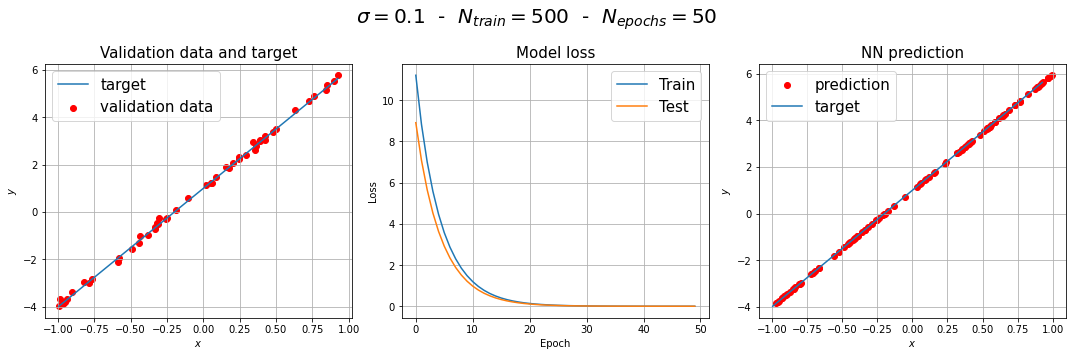

Fit parameters:
m:  4.98575
b:  0.9890099

Test loss: 0.00016915909829549492
Test accuracy: 0.0001691591


In [2]:
model(0.1, 500, 50)

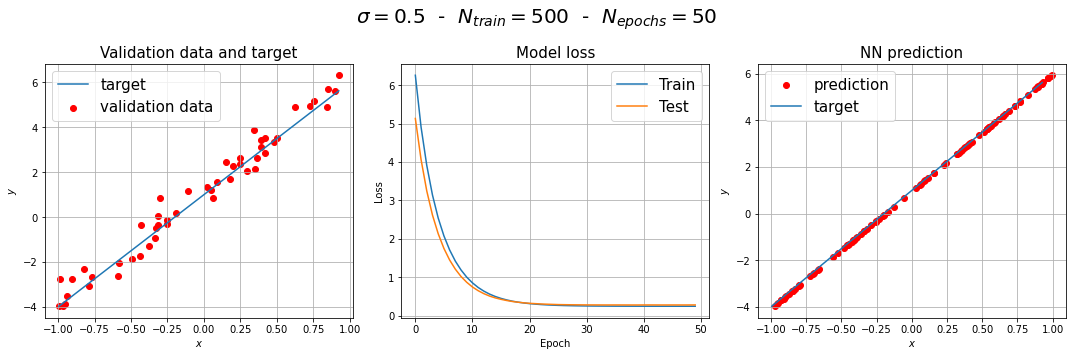

Fit parameters:
m:  5.0346584
b:  0.94530165

Test loss: 0.0035735723935067655
Test accuracy: 0.0035735723


In [3]:
model(0.5, 500, 50)

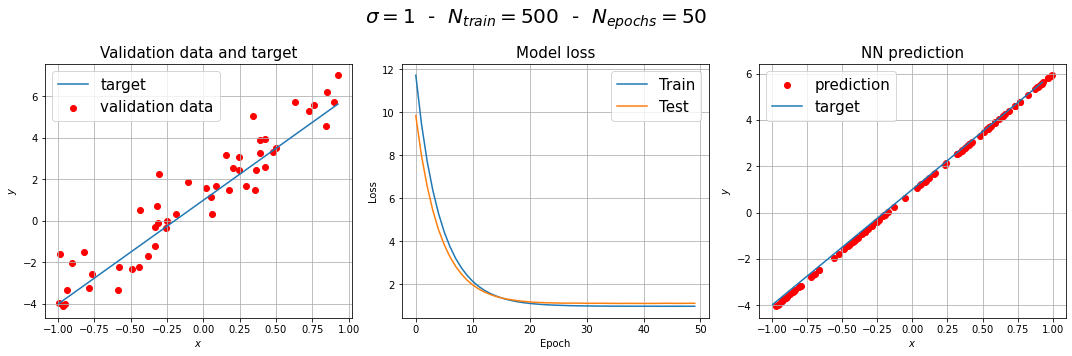

Fit parameters:
m:  5.083117
b:  0.88984996

Test loss: 0.01529532827436924
Test accuracy: 0.015295328


In [4]:
model(1, 500, 50)

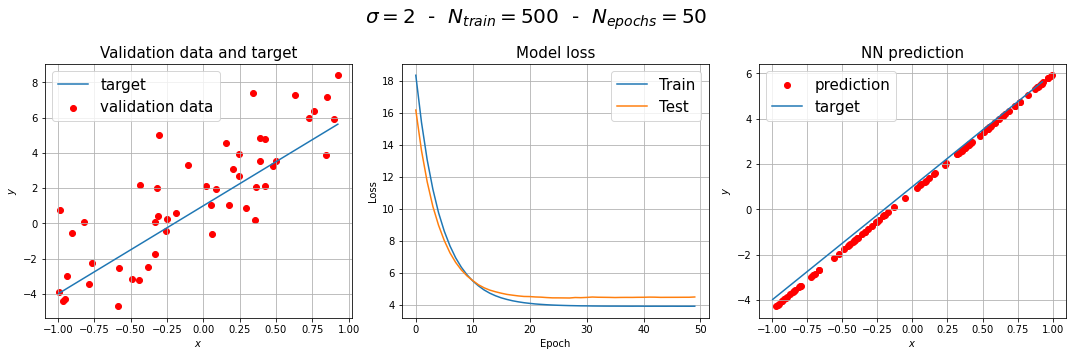

Fit parameters:
m:  5.189373
b:  0.76768595

Test loss: 0.07001572802662849
Test accuracy: 0.07001573


In [5]:
model(2,500,50)

Come ci aspettiamo, l'aumento del rumore nei dati di validazione comporta un aumento dei valori delle funzioni di costo e accuratezza. Al tempo stesso, mantenendo costante il nuemro di epoche e di dati di allenamento osserviamo che per avere scostamenti significativi tra le predizioni e il target è necessario variare di un ordine di grandezza l'ampiezza del rumore. In questo ultimo caso vediamo anche che la funzione di costo sui dati di validazione satura già dopo $20$ eopche, il che ci dice che non è possibile fare di meglio aumentandone il numero.

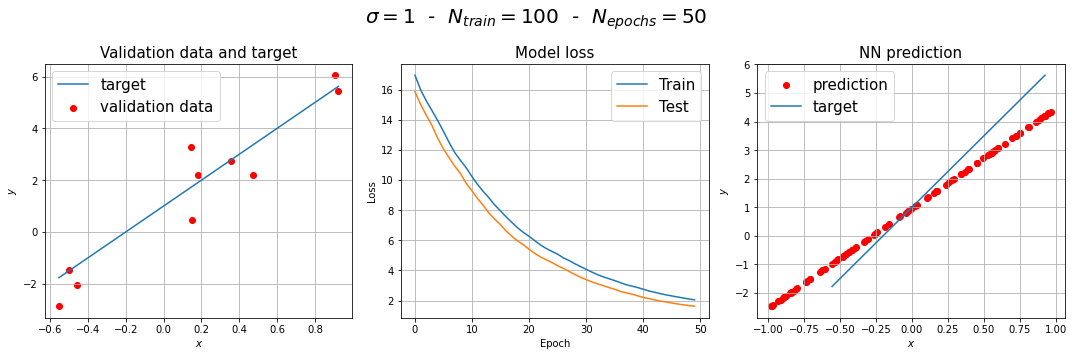

Fit parameters:
m:  3.508208
b:  0.9671605

Test loss: 0.655864417552948
Test accuracy: 0.6558644


In [6]:
model(1,100,50)

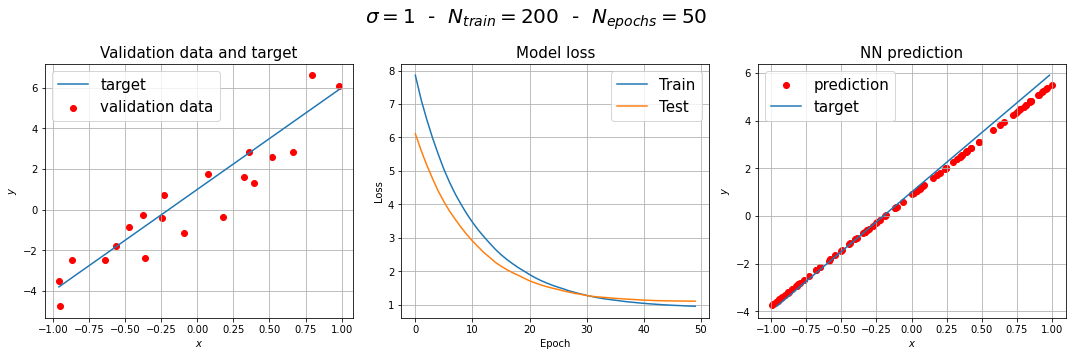

Fit parameters:
m:  4.657209
b:  0.8753503

Test loss: 0.048240017145872116
Test accuracy: 0.048240017


In [7]:
model(1,200,50)

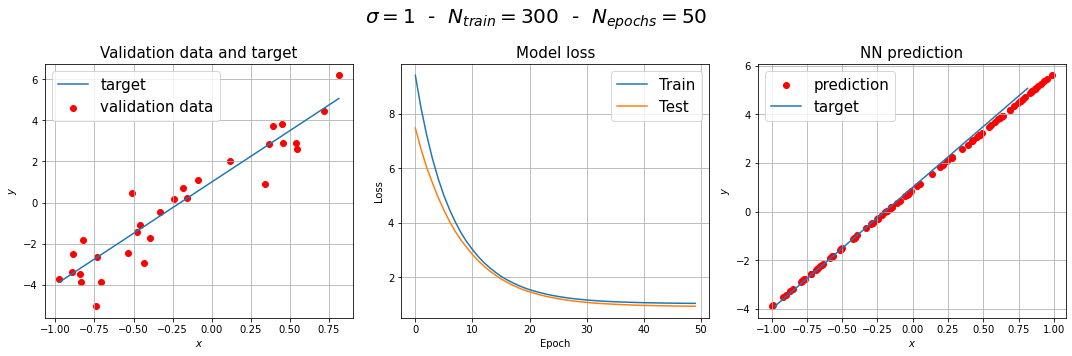

Fit parameters:
m:  4.7847233
b:  0.8979889

Test loss: 0.01690804213285446
Test accuracy: 0.016908042


In [8]:
model(1,300,50)

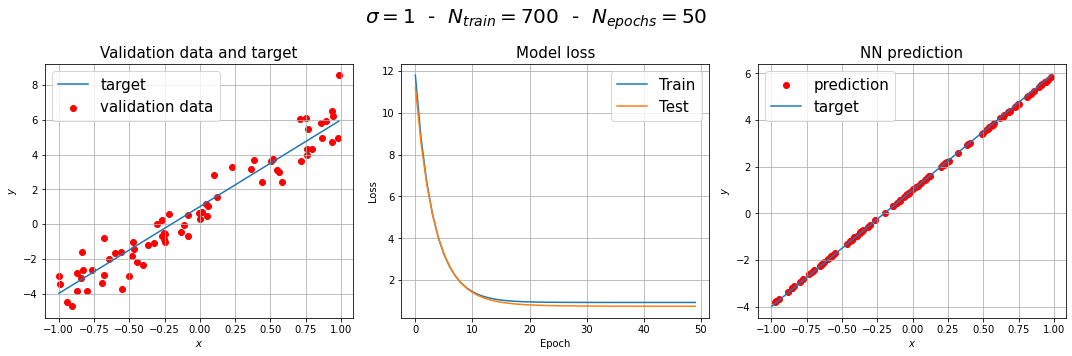

Fit parameters:
m:  4.9368796
b:  1.0003366

Test loss: 0.0014929232586707389
Test accuracy: 0.0014929232


In [9]:
model(1,700,50)

In questo caso abbiamo tenuto fissi il rumore e il numero di epoche mentre abbiamo variato il numero di dati di *training* (e quindi anche di validazione, dal momento che i dati di validazione sono un decimo di quelli di train). Chiaramente, aumentandone il numero i valori della funzione di costo e accuratezza migliorano, insieme all'accordo tra la predizione e il target. Per pochi dati è possibile miglioirare la performance della rete aumentando il numero di epoche, tuttavia non sarà possibile spingersi oltre un certo limite oltre il quale andremo incontro al fenomeno di *overfitting*.

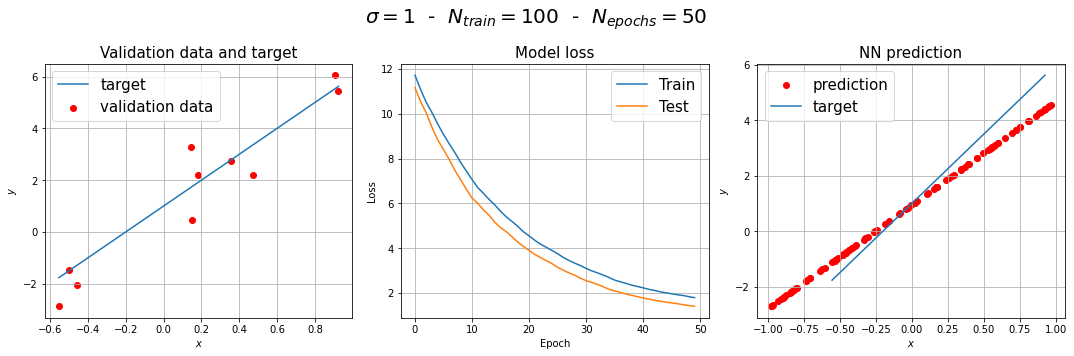

Fit parameters:
m:  3.740083
b:  0.9465122

Test loss: 0.48043036460876465
Test accuracy: 0.48043036


In [10]:
model(1,100,50)

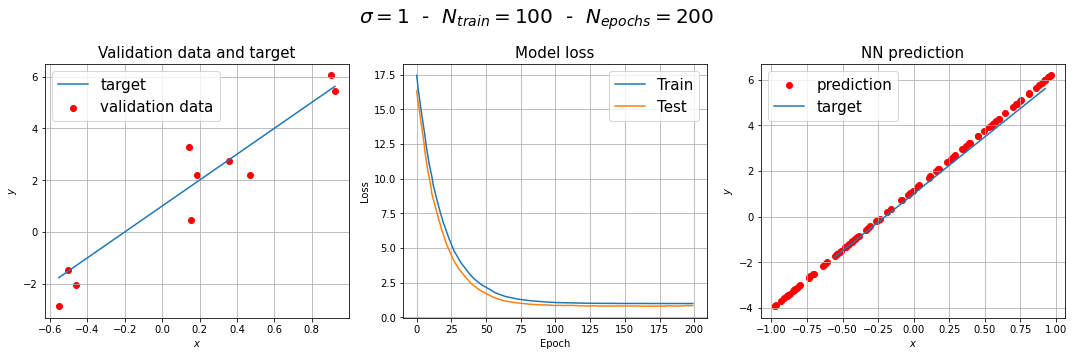

Fit parameters:
m:  5.2268963
b:  1.1695112

Test loss: 0.05597943812608719
Test accuracy: 0.055979438


In [11]:
model(1,100,200)

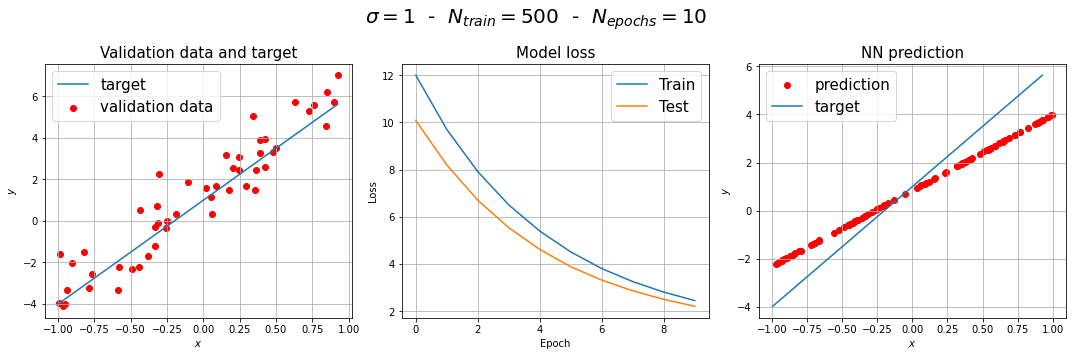

Fit parameters:
m:  3.1488156
b:  0.8450429

Test loss: 1.0871321773529052
Test accuracy: 1.0871322


In [12]:
model(1,500,10)

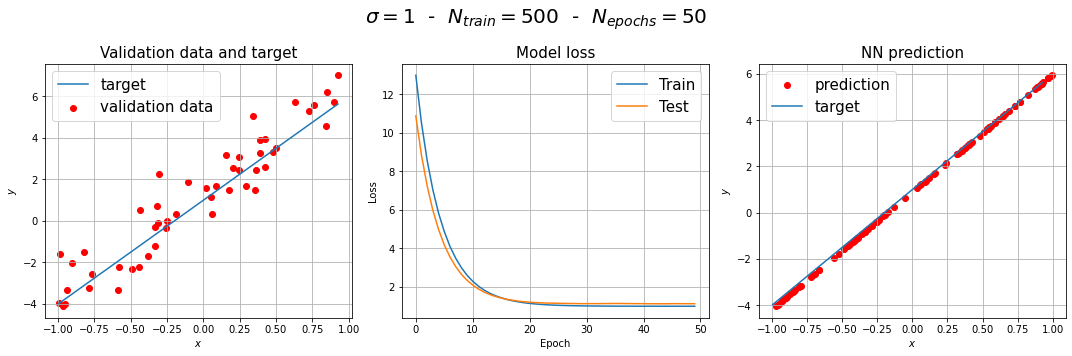

Fit parameters:
m:  5.0844717
b:  0.8960812

Test loss: 0.013994349529966713
Test accuracy: 0.013994349


In [13]:
model(1,500,50)

Nei grafici precedenti abbiamo cercato di mostrare ciò che già precedentemente avevamo intuito: abbiamo tenuto pochi dati di *training* e abbiamo variato di molto il numero di epoche. Ciò che osserviamo nei primi due casi è che nel primo la situazione può migliorare se si aumenta il numero di epoche. Nel secondo caso vediamo una saturazione della performance oltre la quale non è possibile andare aumentando solo il numero di epoche: serve aumentare il numero di dati di *training*. Nei secondi due casi osserviamo una situazione in cui il numero di dati di *training* è ragionevole, ma nel primo caso non è ragionevole il numero di epoche ($10$), come infatti si osserva dai risultati ottenuti. L'ultimo caso riportato, invece, ha parametri ragionevoli che, come si può osservare, danno luogo a un risultato almeno accettabile (anche se non si tratta del miglior fit che abbiamo fatto in questa esercitazione).

### Esercizio 11.2

In questo esercizio vogliamo provare a fittare un polinomio di ordine 3:
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

Di seguito presenteremo alcuni modelli per vedere quale di questi funzioni meglio nel range su cui vogliamo fare il fit. Dopodiché proveremo a fare predizioni anche al di fuori dell'intervallo su cui è avvenuto il fit. 

#### Parametri e dati

In [35]:
#Parameters
N_train = 1000
N_valid = 100

sigma=0.1

a=4
b=3
c=2
d=3

def summary(model):
    x_train = np.random.uniform(-1, 1, N_train)
    x_valid = np.random.uniform(-1, 1, N_valid)
    x_train.sort()

    y_train = np.random.normal(a - b*x_train - c*x_train*x_train + d*x_train**3, sigma)
    y_target = a - b*x_train - c*x_train*x_train + d*x_train**3
    y_valid = np.random.normal(a - b*x_valid - c*x_valid*x_valid + d*x_valid**3, sigma)
    
    bsize = 32
    history = model.fit(x=x_train, y=y_train,
                   batch_size=bsize, epochs=50,
                   validation_data=(x_valid,y_valid), verbose = 0)
    score = model.evaluate(x_train, y_target, batch_size=32, verbose=0)
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(x_train,y_target)
    ax[0].scatter(x_predicted,y_predicted)
    
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss', size=15)
    ax[1].set_ylabel('Loss',size=10)
    ax[1].set_xlabel('Epoch',size=10)
    ax[1].legend(['Train', 'Test'], loc='best', fontsize=15)
    ax[1].grid()
    
    plt.show()
    
    model.get_weights()
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

Nel costruire la rete cercheremo di essere minimali per non creare sistemi eccessivamente complessi che potrebbero dare luogo a *overfitting*. In questa prima parte in cui esploriamo diverse strutture, attiveremo i layer esclusivamente tramite *ReLu*. L'ottimizzazione avviene tramite *sgd*, mentre la funzione costo è lo scarto quadratico medio *mse*.

#### Strutture
La funzione che vogliamo fittare dipende da 4 parametri $a$, $b$, $c$ e $d$. Allora costruiamo una rete composta da un solo layer nascosto, di due neuroni.

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


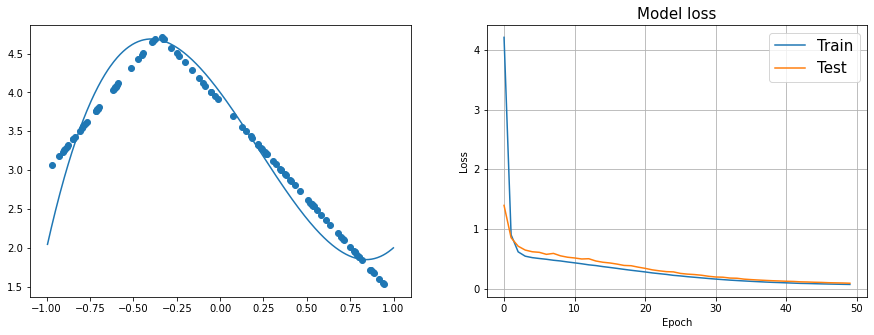


Test loss: 0.06133278572373092
Test accuracy: 0.061332773


In [36]:
model_1 = tf.keras.Sequential()
model_1.add(Dense(2, input_shape=(1,), activation = 'relu'))
model_1.add(Dense(1, activation = 'relu'))

model_1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_1.summary()

summary(model_1)

In questo modello vediamo che la funzione costo decresce col passare delle epoche, il che significa che la rete sta imparando a fare il fit. Dati i pochi neuroni, ovvero i pochi parametri, nel confronto tra dati originali e predetti notiamo ancora un carattere lineare, dove vengono unite tre rette diverse nell'intervallo del fit.

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_81 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


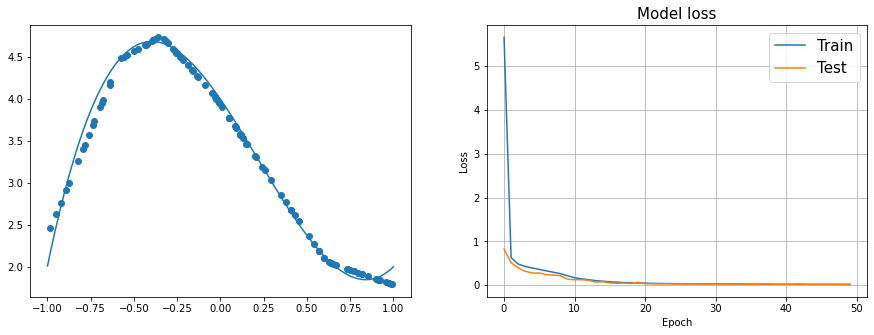


Test loss: 0.009456937779905274
Test accuracy: 0.009456938


In [37]:
model_2 = tf.keras.Sequential()
model_2.add(Dense(10, input_shape=(1,), activation = 'relu'))
model_2.add(Dense(5, input_shape=(1,), activation = 'relu'))
model_2.add(Dense(1, activation = 'relu'))

model_2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_2.summary()

summary(model_2)

Avendo aumentato i parrametri la rete aumenta la sua capacità di predizione, anche se ancora si nota una scarsa flessibilità della rete alla curva richiesta.

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 18)                36        
_________________________________________________________________
dense_84 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_85 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


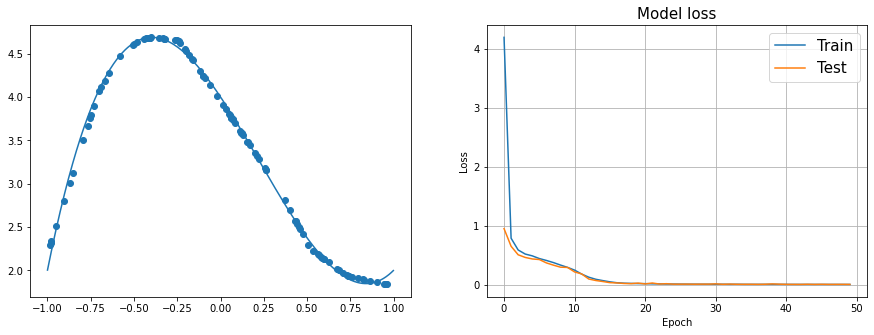


Test loss: 0.002900458979551331
Test accuracy: 0.0029004593


In [38]:
model_3 = tf.keras.Sequential()
model_3.add(Dense(18, input_shape=(1,), activation = 'relu'))
model_3.add(Dense(9, activation = 'relu'))
model_3.add(Dense(9, activation = 'relu'))
model_3.add(Dense(4, activation = 'relu'))
model_3.add(Dense(1, activation = 'relu'))

model_3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_3.summary()

summary(model_3)

Cercando di ottenere risultati migliori aumentiamo di molto i parametri della rete. Osserviamo effettivamente un netto miglioramento, anche se nella coda finale i dati predetti si discostano da quelli attesi. 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


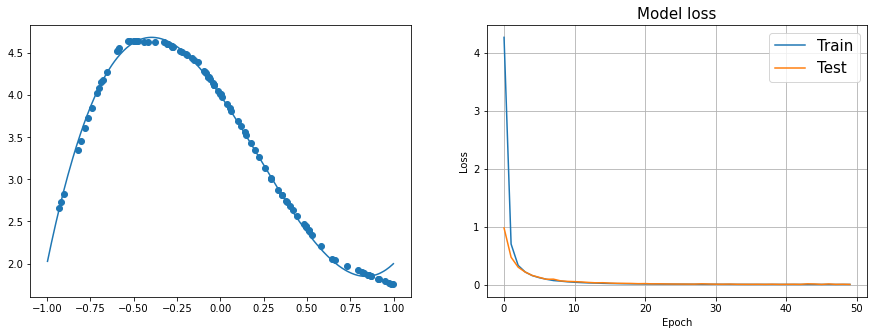


Test loss: 0.00323779073683545
Test accuracy: 0.0032377904


In [18]:
model_4 = tf.keras.Sequential()
model_4.add(Dense(8, input_shape=(1,), activation = 'relu'))
model_4.add(Dense(10, activation = 'relu'))
model_4.add(Dense(10, activation = 'relu'))
model_4.add(Dense(4, activation = 'relu'))
model_4.add(Dense(1, activation = 'relu'))

model_4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_4.summary()

summary(model_4)

Per cercare di ottenere una performace migliore abbiamo ridotto il numero di parametri e abbiamo cercato di seguire una struttura diversa: se nei primi due modelli la rete era costituita da un layer nascosto maggiore e poi da layer di dimensioni minori, ora siamo partiti da un primo layer nascosto di una certa dimensione, abbiamo introdotto due layer di dimensioni superiori, per poi ritornare a un layer di dimensione minore (1, 8, 10, 10, 4, 1). Tuttavia, il fatto di aver meno parametri disponibili fa si che la performance, per quanto buona, non sia migliore. Per questo procediamo con una rete strutturata nei seguenti layer: 18, 9, 9, 4, 1.

#### Funzioni di attivazione

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 18)                36        
_________________________________________________________________
dense_89 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_90 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_91 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


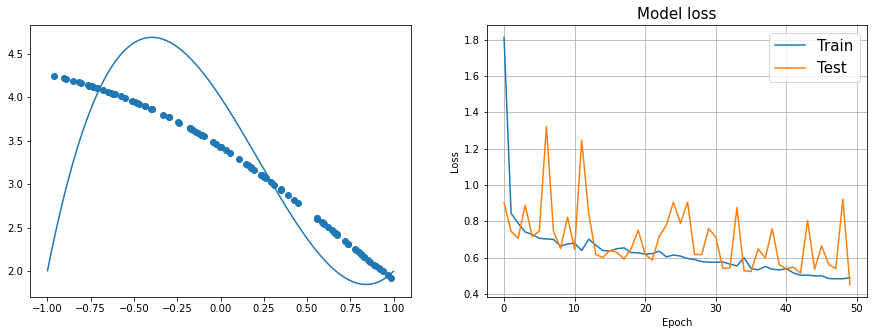


Test loss: 0.43569326379150153
Test accuracy: 0.4356933


In [39]:
model_5 = tf.keras.Sequential()
model_5.add(Dense(18, input_shape=(1,), activation = 'softplus'))
model_5.add(Dense(9, activation = 'softplus'))
model_5.add(Dense(9, activation = 'softplus'))
model_5.add(Dense(4, activation = 'softplus'))
model_5.add(Dense(1, activation = 'softplus'))

model_5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_5.summary()

summary(model_5)

L'utilizzo della funzione di attivazione *softplus* non funziona con questo tipo di rete

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 18)                36        
_________________________________________________________________
dense_94 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_95 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_96 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


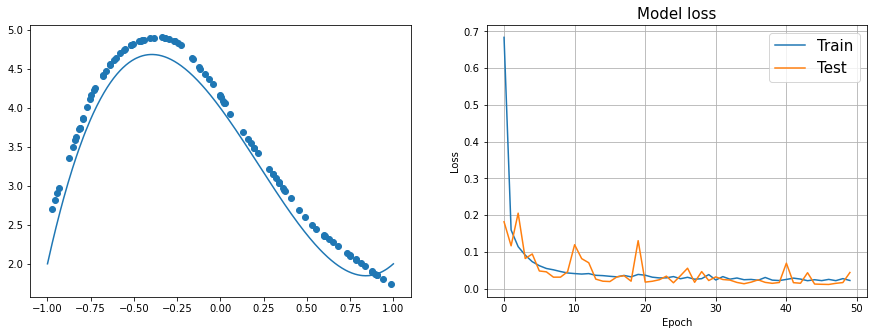


Test loss: 0.04752679144218564
Test accuracy: 0.047526807


In [40]:
model_6 = tf.keras.Sequential()
model_6.add(Dense(18, input_shape=(1,), activation = 'selu'))
model_6.add(Dense(9, activation = 'selu'))
model_6.add(Dense(9, activation = 'selu'))
model_6.add(Dense(4, activation = 'selu'))
model_6.add(Dense(1, activation = 'selu'))

model_6.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_6.summary()

summary(model_6)

Anche la funzione *selu* non è quella ottimale per allenare la rete.

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 18)                36        
_________________________________________________________________
dense_109 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_110 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_111 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


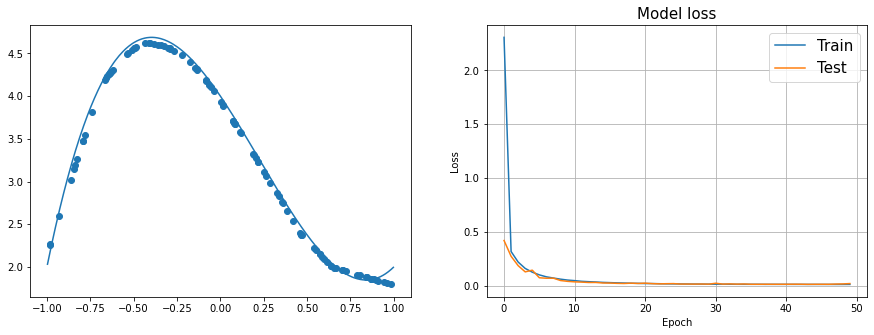


Test loss: 0.005767735426314175
Test accuracy: 0.005767735


In [43]:
model_7 = tf.keras.Sequential()
model_7.add(Dense(18, input_shape=(1,), activation = 'relu'))
model_7.add(Dense(9, activation = 'relu'))
model_7.add(Dense(9, activation = 'relu'))
model_7.add(Dense(4, activation = 'selu'))
model_7.add(Dense(1, activation = 'selu'))

model_7.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model_7.summary()

summary(model_7)

La combinazione delle due funzioni di attivazione presenta una buona performance che non è tuttavia migliore di quella ottenuta solo con la funzione *relu*.

#### Ottimizzazione

Proviamo di seguito alcuni algoritmi di ottimizzazione.

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 18)                36        
_________________________________________________________________
dense_129 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_130 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_131 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


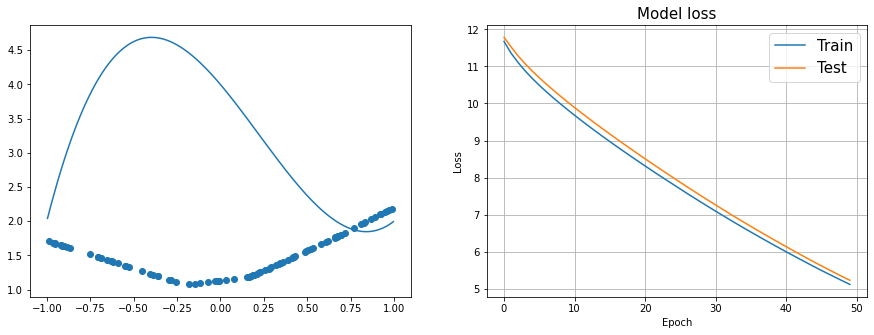


Test loss: 5.046480374015868
Test accuracy: 5.0464807


In [47]:
model_8 = tf.keras.Sequential()
model_8.add(Dense(18, input_shape=(1,), activation = 'relu'))
model_8.add(Dense(9, activation = 'relu'))
model_8.add(Dense(9, activation = 'relu'))
model_8.add(Dense(4, activation = 'relu'))
model_8.add(Dense(1, activation = 'relu'))

model_8.compile(optimizer='adagrad', loss='mse', metrics=['mse'])
model_8.summary()

summary(model_8)

*Adagrad* non performa bene quanto *sgd*.

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 18)                36        
_________________________________________________________________
dense_149 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_150 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_151 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


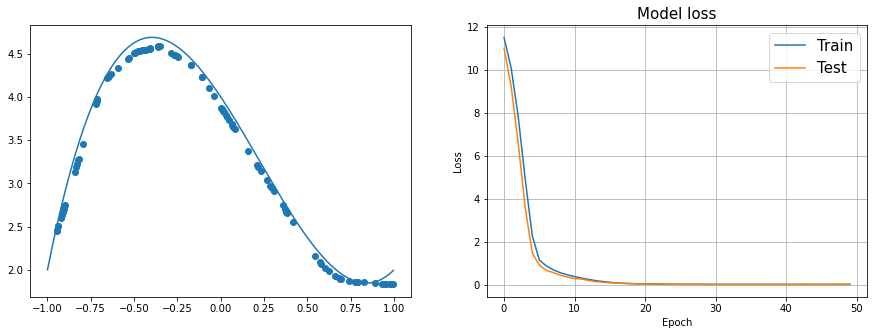


Test loss: 0.00993016974744387
Test accuracy: 0.009930168


In [51]:
model_9 = tf.keras.Sequential()
model_9.add(Dense(18, input_shape=(1,), activation = 'relu'))
model_9.add(Dense(9, activation = 'relu'))
model_9.add(Dense(9, activation = 'relu'))
model_9.add(Dense(4, activation = 'relu'))
model_9.add(Dense(1, activation = 'relu'))

model_9.compile(optimizer='RMSProp', loss='mse', metrics=['mse'])
model_9.summary()

summary(model_9)

*RMSProp* performa meglio rispetto ad *Adagrad* ma non bene quanto *sgd*.

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 18)                36        
_________________________________________________________________
dense_159 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_160 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_161 (Dense)            (None, 4)                 40        
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 5         
Total params: 342
Trainable params: 342
Non-trainable params: 0
_________________________________________________________________


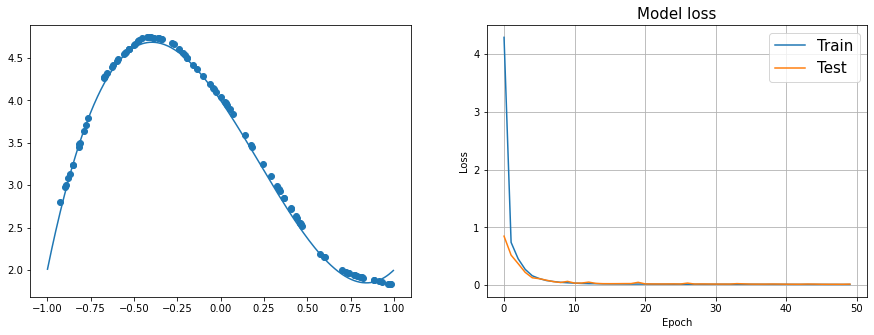


Test loss: 0.004630357919959352
Test accuracy: 0.0046303594


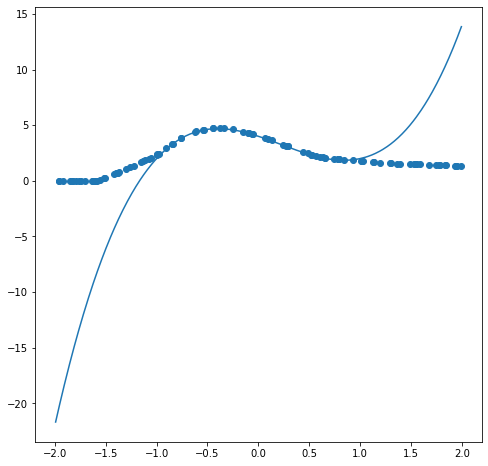

In [53]:
model = tf.keras.Sequential()
model.add(Dense(18, input_shape=(1,), activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

summary(model)

x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
x_train = np.random.uniform(-2, 2, N_train)
x_train.sort()
y_target = a - b*x_train - c*x_train*x_train + d*x_train**3

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x_train,y_target)
ax.scatter(x_predicted,y_predicted)
    

Come possiamo osservare dal grafico riportato in figura, i valori predetti dalla rete al di fuori dell'intervallo su cui è stata allenata non rispecchiano più l'andamento della funzione.

In conclusione abbiamo osservato che la rete più performante è quella con più parametri, i cui neuroni sono attivati tramite *relu* e che usa la discesa stocastica del gradiente.

### Esercizio 11.3
  
Estendiamo il modello a fare fitting su $f(x,y) = \sin(x^2+y^2)$ nell'intervallo $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

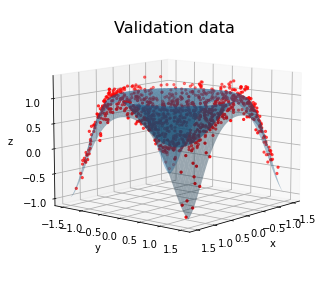

In [55]:
N_train = 10000
N_test = 1000
sigma = 0.1
N_epochs = 100

x_train = np.random.uniform(-1.5, 1.5, N_train)
x_valid = np.random.uniform(-1.5, 1.5, N_test)
y_train = np.random.uniform(-1.5, 1.5, N_train)
y_valid = np.random.uniform(-1.5, 1.5, N_test)
x_valid.sort()

z_target = np.sin(x_valid**2 + y_valid**2)
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x_valid, y_valid, z_valid, marker='.', color='r')
x_plot = np.linspace(-1.5,1.5, 100)
y_plot = np.linspace(-1.5,1.5, 100)
X, Y = np.meshgrid(x_plot,y_plot)
ax.plot_surface(X, Y, np.sin(X**2 + Y**2), alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Validation data", fontsize=16, y=0.96)
ax.view_init(10, 40)

Per fittare questo dataset impostiamo una rete più complessa delle precedenti, ma cercando di rispettare la struttura delle dimensioni dei layer (minore, maggiore, maggiore, minore).

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 45)                135       
_________________________________________________________________
dense_168 (Dense)            (None, 30)                1380      
_________________________________________________________________
dense_169 (Dense)            (None, 27)                837       
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 28        
Total params: 2,380
Trainable params: 2,380
Non-trainable params: 0
_________________________________________________________________


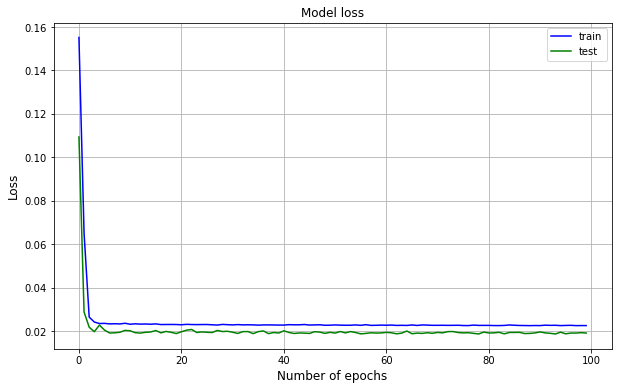

In [56]:
bsize=32
model1 = tf.keras.Sequential()
model1.add(Dense(45, input_shape=(2,), activation = 'relu'))
model1.add(Dense(30, activation = 'relu'))
model1.add(Dense(27, activation = 'relu'))
model1.add(Dense(1, activation = 'relu'))

model1.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model1.summary()

xy_train = np.array([x_train, y_train])
xy_train = xy_train.transpose()
xy_valid = np.array([x_valid, y_valid])
xy_valid = xy_valid.transpose()

history1 = model1.fit(x=xy_train, y=z_train,
                    batch_size=bsize, epochs=N_epochs,
                    shuffle=True,
                    validation_data=(xy_valid,z_valid), verbose = 0)

plt.figure(figsize=(10,6))
plt.plot(history1.history['loss'], color='b', label='train')
plt.plot(history1.history['val_loss'], color='g', label='test')
plt.title('Model loss')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Number of epochs', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

score = model1.evaluate(xy_valid, z_valid, batch_size=32, verbose=0)
score1 = model1.evaluate(xy_valid, z_target, batch_size=32, verbose=0)



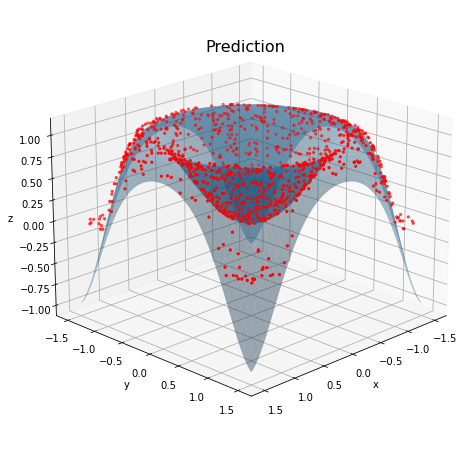

In [58]:
x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
xy_predicted = np.array([x_predicted,y_predicted])
xy_predicted = xy_predicted.transpose()

z_predicted = model1.predict(xy_predicted)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(x_predicted, y_predicted, z_predicted, marker='.', color='r')
x_plot = np.linspace(-1.5,1.5, 100)
y_plot = np.linspace(-1.5,1.5, 100)
X, Y = np.meshgrid(x_plot,y_plot)
ax.plot_surface(X, Y, np.sin(X**2 + Y**2), alpha=0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Prediction", fontsize=16, y=0.96)
ax.view_init(20, 45)